<a href="https://colab.research.google.com/github/anish1205/TraderSentimentalAnalysis/blob/main/TraderEmotionsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

df=pd.read_csv("fear_greed_index.csv")

In [3]:
import numpy as np

In [4]:
df

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [5]:
ds=pd.read_csv("historical_data.csv",on_bad_lines='skip')

In [6]:
ds

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [7]:
import pandas as pd


btc_df = pd.read_csv('historical_data.csv')

# Convert timestamp to date
btc_df['date'] = pd.to_datetime(btc_df['Timestamp'], unit='ms').dt.date   # the pandas datetime conversion is in format of [ date time ] ex:- 2018-02-01 00:00:00 ] .. so we need only date thats why its dt.date


In [8]:
btc_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27


In [9]:
fear_greed_df=pd.read_csv("fear_greed_index.csv")
fear_greed_df['timestamp']=pd.to_datetime(fear_greed_df['timestamp'],unit='s').dt.date

In [10]:
fear_greed_df    # duplicate coloumns so we drop timestamp coloumn

,timestamp,value,classification,date
0,2018-02-01,30,Fear,2018-02-01
1,2018-02-02,15,Extreme Fear,2018-02-02
2,2018-02-03,40,Fear,2018-02-03
3,2018-02-04,24,Extreme Fear,2018-02-04
4,2018-02-05,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,2025-04-28,54,Neutral,2025-04-28
2640,2025-04-29,60,Greed,2025-04-29
2641,2025-04-30,56,Greed,2025-04-30
2642,2025-05-01,53,Neutral,2025-05-01


In [11]:
fear_greed_df.drop('timestamp',axis=1,inplace=True)  # axis=1 for coloumns  and  axis=0 for rows

In [12]:
fear_greed_df.head()

,value,classification,date
0,30,Fear,2018-02-01
1,15,Extreme Fear,2018-02-02
2,40,Fear,2018-02-03
3,24,Extreme Fear,2018-02-04
4,11,Extreme Fear,2018-02-05


In [13]:
btc_df.drop('Timestamp',axis=1,inplace=True)    # as now we no longer need timestamps as they already converted into date

In [14]:
btc_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27


In [15]:
fear_greed_df['date'].head()

,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05


In [16]:
# ensuring date coloumn will be in format of datetime .. for further process

fear_greed_df['date']=pd.to_datetime(fear_greed_df['date'])

In [17]:
fear_greed_df['date'].head()

,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05


In [18]:
# filter in 2024 - 2025 data from fear-greed dataset -- need datetime format
filter_df=fear_greed_df[(fear_greed_df['date'].dt.year== 2024) | (fear_greed_df['date'].dt.year==2025)].reset_index(drop=True)

In [19]:
filter_df.head()

,value,classification,date
0,65,Greed,2024-01-01
1,71,Greed,2024-01-02
2,70,Greed,2024-01-03
3,68,Greed,2024-01-04
4,72,Greed,2024-01-05


In [20]:
# historical data ...date coloumn also going to be converted into datetime format

btc_df['date']=pd.to_datetime(btc_df['date'])

In [21]:
# MERGE ON DATE

merged_df=pd.merge(btc_df,filter_df,on='date')

In [22]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27,74,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27,74,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27,74,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27,74,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27,74,Greed


In [23]:
print(merged_df[['Closed PnL', 'Direction','classification']])

          Closed PnL    Direction classification
0           0.000000          Buy          Greed
1           0.000000          Buy          Greed
2           0.000000          Buy          Greed
3           0.000000          Buy          Greed
4           0.000000          Buy          Greed
...              ...          ...            ...
183210    -82.883731  Close Short           Fear
183211   -150.515250  Close Short           Fear
183212    -78.869991  Close Short           Fear
183213    -87.098158  Close Short           Fear
183214 -35681.747230  Close Short           Fear

[183215 rows x 3 columns]


In [24]:
merged_df[merged_df["Closed PnL"]==0]["Direction"].value_counts()

,count
Direction,
Open Long,45173
Open Short,32687
Buy,14657
Sell,256
Spot Dust Conversion,137
Close Short,21
Close Long,11
Short > Long,1


In [25]:
merged_df[merged_df["classification"]=='Fear']["Direction"].value_counts()

,count
Direction,
Open Long,37828
Close Long,36555
Open Short,23472
Close Short,20232
Buy,7977
Sell,7687
Short > Long,43
Spot Dust Conversion,40
Long > Short,36


In [26]:
closed_trades = merged_df[merged_df["Direction"].str.contains("Close", na=False)]


In [27]:
closed_trades

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,date,value,classification
142,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,242.49,14.78,3584.00,SELL,03-12-2024 20:56,1000.00,Close Long,139.418262,0x94e25a0cc04d89b3ad530418544d29020118004cffc9...,52305625381,True,1.254400,2.380000e+14,2024-10-27,74,Greed
143,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,242.47,8.65,2097.37,SELL,03-12-2024 20:56,985.22,Close Long,81.421585,0x94e25a0cc04d89b3ad530418544d29020118004cffc9...,52305625381,True,0.734077,4.160000e+14,2024-10-27,74,Greed
144,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,242.46,13.67,3314.43,SELL,03-12-2024 20:56,976.57,Close Long,128.537643,0x94e25a0cc04d89b3ad530418544d29020118004cffc9...,52305625381,True,1.160049,1.120000e+15,2024-10-27,74,Greed
145,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,242.45,0.06,14.55,SELL,03-12-2024 20:56,962.90,Close Long,0.563574,0x94e25a0cc04d89b3ad530418544d29020118004cffc9...,52305625381,True,0.005091,5.980000e+13,2024-10-27,74,Greed
146,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,AAVE,242.36,3.68,891.88,SELL,03-12-2024 20:56,962.84,Close Long,34.234672,0x94e25a0cc04d89b3ad530418544d29020118004cffc9...,52305625381,True,0.312159,6.480000e+14,2024-10-27,74,Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183210,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.60,4.13,551.77,BUY,18-04-2025 20:03,-1797.88,Close Short,-82.883731,0xbbde0f181b617f8d2e2a0421c9a82a02077000c2d6ba...,87333347541,False,0.055176,6.900000e+14,2025-02-19,44,Fear
183211,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.60,7.50,1002.00,BUY,18-04-2025 20:03,-1793.75,Close Short,-150.515250,0x6bd337120e6f682326d30421c9a82a02077100566072...,87333347541,False,0.100200,6.610000e+13,2025-02-19,44,Fear
183212,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.60,3.93,525.05,BUY,18-04-2025 20:03,-1786.25,Close Short,-78.869991,0xdbff44ed44a78acf124c0421c9a82a0207720000b450...,87333347541,False,0.052504,1.010000e+15,2025-02-19,44,Fear
183213,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,SOL,133.60,4.34,579.82,BUY,18-04-2025 20:03,-1782.32,Close Short,-87.098158,0xd8f4fcfddd57c09658a90421c9a82a0207780007b85e...,87333347541,False,0.057982,2.700000e+13,2025-02-19,44,Fear


In [28]:
grouped = merged_df.groupby(["classification", "Direction"])["Closed PnL"].mean().reset_index()

In [29]:
grouped

,classification,Direction,Closed PnL
0,Extreme Greed,Buy,0.000000
1,Extreme Greed,Close Long,37.634445
2,Extreme Greed,Close Short,43.706135
3,Extreme Greed,Long > Short,63.958684
4,Extreme Greed,Open Long,0.000000
5,Extreme Greed,Open Short,0.000000
6,Extreme Greed,Sell,0.000000
7,Extreme Greed,Short > Long,140.676320
8,Fear,Buy,0.000000
9,Fear,Close Long,72.203980


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
def categorize(pnl=merged_df['Closed PnL']):
          if pnl>0:
             return "PROFIT"
          if pnl<0:
             return "LOSS"
          else:
             return "NEUTRAL"

merged_df['PnL Category']=merged_df['Closed PnL'].apply(categorize)


In [32]:
grouped =merged_df.groupby(["classification", "Direction", "PnL Category"]).size().reset_index(name='Count')

print(grouped)

   classification             Direction PnL Category  Count
0   Extreme Greed                   Buy      NEUTRAL     88
1   Extreme Greed            Close Long         LOSS    522
2   Extreme Greed            Close Long      NEUTRAL      2
3   Extreme Greed            Close Long       PROFIT   1865
4   Extreme Greed           Close Short         LOSS    391
..            ...                   ...          ...    ...
56        Neutral                  Sell         LOSS     17
57        Neutral                  Sell      NEUTRAL    178
58        Neutral                  Sell       PROFIT    100
59        Neutral          Short > Long       PROFIT      2
60        Neutral  Spot Dust Conversion      NEUTRAL     58

[61 rows x 4 columns]


<Axes: xlabel='classification', ylabel='Count'>

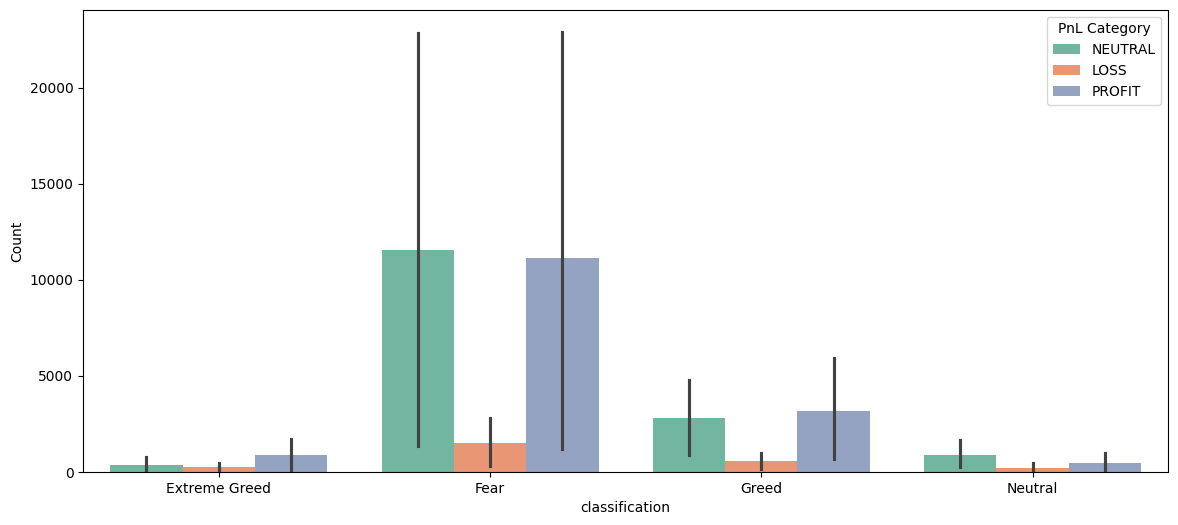

In [33]:
# Step 3: Plot using seaborn
plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x="classification", y="Count", hue="PnL Category", palette="Set2")



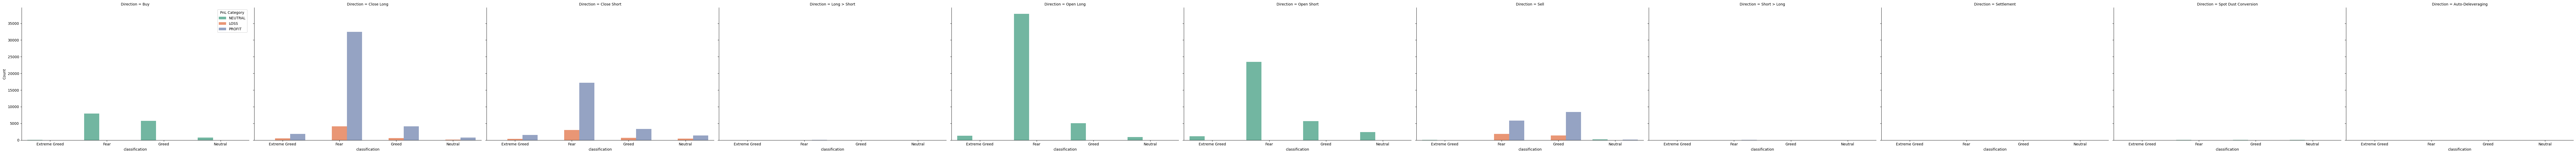

In [37]:
g = sns.catplot(
    data=grouped,
    kind="bar",
    x="classification",
    y="Count",
    hue="PnL Category",
    col="Direction",
    palette="Set2",
    height=6,
    aspect=1.5,
    legend_out=False
)

plt.savefig("classification_pnl_direction.png", dpi=300, bbox_inches="tight")
plt.show()

# Insights

1. Greed is often linked with trades that were not executed or yielded no profit/loss (PnL = 0):

- Many trades classified as "Greed" fall under the “Trade Not Executed” or zero PnL category.

- This may imply missed opportunities due to overconfidence or hesitation waiting for perfect entries.

2. Fear is predominantly associated with loss-making trades:

- Most negative PnL trades are linked with the “Fear” classification.

- Fear might cause traders to exit prematurely, ignore signals, or act out of panic, leading to losses.

3. Direction affects outcomes:

- There may be a pattern where certain directions (e.g., Sell or Close Short) show more losses when paired with fear, and certain directions (e.g., Buy) show missed profits under greed.

- This can indicate bias towards certain market directions or poor exit strategies.



# How Can a Trader makes his performance bettter? (based on these observations)

1. Create Emotion-Based Rules:

If fear leads to premature exits, introduce rules like:

"Hold until stop-loss or technical signal triggers."

If greed leads to no trades, use structured entry rules:

"Enter when signal is met, even if setup is not perfect."

2. Backtest with Emotion Filters:

Run backtests by excluding trades marked as “fear-based” or “greed-based” to see their historical impact.

This helps in filtering emotionally driven bad trades from the system.

3. Mindset Training:

Incorporate journaling, meditation, or trading psychology books to build resilience.

Understand how your reactions under stress affect performance.

Better Trade Execution Discipline:

Focus on consistency and rule-based trading rather than relying on emotion.

Automate parts of the strategy to reduce discretionary errors caused by emotions.

